**Import packages that are required for project**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

**mount Google Drive and read the dataset**

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

employee_compensation_data = pd.read_csv("drive/MyDrive/Employee_Compensation.csv")

employee_compensation_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,3,1400,1404,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,790.0,"SEIU, Local 1021, Misc",...,37486688,60720.01,0.00,0.00,60720.01,13653.20,14733.76,4904.34,33291.30,94011.31
1,3,9700,9703,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,"SEIU, Local 1021, Misc",...,39646203,91677.00,0.00,0.00,91677.00,17524.20,14733.76,7411.13,39669.09,131346.09
2,3,2900,2918,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,"SEIU, Local 1021, Misc",...,37486043,89106.03,0.00,1540.00,90646.03,17327.20,14733.76,7401.92,39462.88,130108.91
3,3,2900,2918,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,"SEIU, Local 1021, Misc",...,37615772,85581.11,3355.94,337.75,89274.80,16359.16,14151.56,7096.21,37606.93,126881.73
4,3,2900,2905,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,"SEIU, Local 1021, Misc",...,37500212,86457.00,0.00,2090.00,88547.00,16925.97,14733.76,7257.89,38917.62,127464.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799557,2,9100,9163,Calendar,2013,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,253.0,"Transport Workers - Transit Operators, Local 2...",...,53367,11142.31,1108.66,951.82,13202.79,2895.51,2257.40,1034.29,6187.20,19389.99
799558,1,H000,H002,Fiscal,2016,Public Protection,FIR,FIR Fire Department,798.0,"Firefighters - Miscellaneous, Local 798",...,53368,113827.04,3522.20,18443.14,135792.38,22601.81,15861.13,2298.46,40761.40,176553.78
799559,1,H000,H002,Fiscal,2015,Public Protection,FIR,FIR Fire Department,798.0,"Firefighters - Miscellaneous, Local 798",...,53368,112703.74,6164.15,17442.37,136310.26,27146.96,15230.57,2247.85,44625.38,180935.64
799560,1,H000,H002,Fiscal,2014,Public Protection,FIR,FIR Fire Department,798.0,"Firefighters - Miscellaneous, Local 798",...,53368,112935.01,0.00,18592.15,131527.16,25701.56,15245.17,2161.89,43108.62,174635.78


**Finding Dataframe shape(rows, columns)**

In [ ]:
employee_compensation_data.shape

(799562, 22)

**Find the first 5 rows from dataset using head()**

In [ ]:
employee_compensation_data.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,3,1400,1404,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,790.0,"SEIU, Local 1021, Misc",...,37486688,60720.01,0.00,0.00,60720.01,13653.20,14733.76,4904.34,33291.30,94011.31
1,3,9700,9703,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,"SEIU, Local 1021, Misc",...,39646203,91677.00,0.00,0.00,91677.00,17524.20,14733.76,7411.13,39669.09,131346.09
2,3,2900,2918,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,"SEIU, Local 1021, Misc",...,37486043,89106.03,0.00,1540.00,90646.03,17327.20,14733.76,7401.92,39462.88,130108.91
3,3,2900,2918,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,"SEIU, Local 1021, Misc",...,37615772,85581.11,3355.94,337.75,89274.80,16359.16,14151.56,7096.21,37606.93,126881.73
4,3,2900,2905,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,"SEIU, Local 1021, Misc",...,37500212,86457.00,0.00,2090.00,88547.00,16925.97,14733.76,7257.89,38917.62,127464.62


**Data Transformation::Renaming of Column names**

In [ ]:
employee_compensation_data.columns = employee_compensation_data.columns.str.replace(' ', '_')
employee_compensation_data.columns

Index(['Organization_Group_Code', 'Job_Family_Code', 'Job_Code', 'Year_Type',
       'Year', 'Organization_Group', 'Department_Code', 'Department',
       'Union_Code', 'Union', 'Job_Family', 'Job', 'Employee_Identifier',
       'Salaries', 'Overtime', 'Other_Salaries', 'Total_Salary', 'Retirement',
       'Health_and_Dental', 'Other_Benefits', 'Total_Benefits',
       'Total_Compensation'],
      dtype='object')

**Data Transformation:: changing column names to lowercase letters**

In [ ]:
employee_compensation_data.columns = employee_compensation_data.columns.str.lower()
employee_compensation_data.columns

Index(['organization_group_code', 'job_family_code', 'job_code', 'year_type',
       'year', 'organization_group', 'department_code', 'department',
       'union_code', 'union', 'job_family', 'job', 'employee_identifier',
       'salaries', 'overtime', 'other_salaries', 'total_salary', 'retirement',
       'health_and_dental', 'other_benefits', 'total_benefits',
       'total_compensation'],
      dtype='object')

**Data Transformation: Dropping unnecessary columns from dataset**

In [ ]:
employee_compensation_data.drop(['organization_group_code', 'job_family_code', 'job_code', 'union_code', 'employee_identifier']
                                , axis='columns'
                                , inplace=True)

In [ ]:
employee_compensation_data.head()

,year_type,year,organization_group,department_code,department,union,job_family,job,salaries,overtime,other_salaries,total_salary,retirement,health_and_dental,other_benefits,total_benefits,total_compensation
0,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,"SEIU, Local 1021, Misc","Clerical, Secretarial & Steno",Clerk,60720.01,0.00,0.00,60720.01,13653.20,14733.76,4904.34,33291.30,94011.31
1,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,"SEIU, Local 1021, Misc",Community Development,HSA Emp & Training Spec II,91677.00,0.00,0.00,91677.00,17524.20,14733.76,7411.13,39669.09,131346.09
2,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,"SEIU, Local 1021, Misc",Human Services,HSA Social Worker,89106.03,0.00,1540.00,90646.03,17327.20,14733.76,7401.92,39462.88,130108.91
3,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,"SEIU, Local 1021, Misc",Human Services,HSA Social Worker,85581.11,3355.94,337.75,89274.80,16359.16,14151.56,7096.21,37606.93,126881.73
4,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,"SEIU, Local 1021, Misc",Human Services,HSA Sr Eligibility Worker,86457.00,0.00,2090.00,88547.00,16925.97,14733.76,7257.89,38917.62,127464.62


**Data_Clean: checking for null values**

In [ ]:
employee_compensation_data.isnull().any()

year_type             False
year                  False
organization_group    False
department_code        True
department             True
union                  True
job_family            False
job                    True
salaries              False
overtime              False
other_salaries        False
total_salary          False
retirement            False
health_and_dental     False
other_benefits        False
total_benefits        False
total_compensation    False
dtype: bool

**Data_Clean:Finding sum of null values**

In [ ]:
employee_compensation_data.isnull().sum()

year_type               0
year                    0
organization_group      0
department_code         2
department              2
union                 179
job_family              0
job                     5
salaries                0
overtime                0
other_salaries          0
total_salary            0
retirement              0
health_and_dental       0
other_benefits          0
total_benefits          0
total_compensation      0
dtype: int64

**Data_clean: Dropping NAs from the dataframe**

In [ ]:
employee_compensation_data.isna().any()

year_type             False
year                  False
organization_group    False
department_code        True
department             True
union                  True
job_family            False
job                    True
salaries              False
overtime              False
other_salaries        False
total_salary          False
retirement            False
health_and_dental     False
other_benefits        False
total_benefits        False
total_compensation    False
dtype: bool

In [ ]:
employee_compensation_data.dropna(inplace=True)

In [ ]:
employee_compensation_data.isna().any()

year_type             False
year                  False
organization_group    False
department_code       False
department            False
union                 False
job_family            False
job                   False
salaries              False
overtime              False
other_salaries        False
total_salary          False
retirement            False
health_and_dental     False
other_benefits        False
total_benefits        False
total_compensation    False
dtype: bool

**Display Summary and Data_types**

In [ ]:
employee_compensation_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799376 entries, 0 to 799561
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_type           799376 non-null  object 
 1   year                799376 non-null  int64  
 2   organization_group  799376 non-null  object 
 3   department_code     799376 non-null  object 
 4   department          799376 non-null  object 
 5   union               799376 non-null  object 
 6   job_family          799376 non-null  object 
 7   job                 799376 non-null  object 
 8   salaries            799376 non-null  float64
 9   overtime            799376 non-null  float64
 10  other_salaries      799376 non-null  float64
 11  total_salary        799376 non-null  float64
 12  retirement          799376 non-null  float64
 13  health_and_dental   799376 non-null  float64
 14  other_benefits      799376 non-null  float64
 15  total_benefits      799376 non-nul

In [ ]:
employee_compensation_data.dtypes

year_type              object
year                    int64
organization_group     object
department_code        object
department             object
union                  object
job_family             object
job                    object
salaries              float64
overtime              float64
other_salaries        float64
total_salary          float64
retirement            float64
health_and_dental     float64
other_benefits        float64
total_benefits        float64
total_compensation    float64
dtype: object

In [ ]:
type(employee_compensation_data.dtypes)

pandas.core.series.Series

In [ ]:
dtypesdf= pd.DataFrame(employee_compensation_data.dtypes)
dtypesdf

,0
year_type,object
year,int64
organization_group,object
department_code,object
department,object
union,object
job_family,object
job,object
salaries,float64
overtime,float64


**Just to demonstrate with a regular expression**

In [ ]:
employee_compensation_data.filter(regex='2019', axis=0)

,year_type,year,organization_group,department_code,department,union,job_family,job,salaries,overtime,other_salaries,total_salary,retirement,health_and_dental,other_benefits,total_benefits,total_compensation
2019,Calendar,2018,General Administration & Finance,TIS,Department of Technology,"Prof & Tech Eng, Local 21",Information Systems,IS Engineer-Principal,158420.02,0.00,0.00,158420.02,29624.08,14433.94,11031.82,55089.84,213509.86
12019,Fiscal,2017,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agcy,"TWU, Local 250-A, TransitOpr",Street Transit,Transit Operator,74356.14,9815.69,4244.69,88416.52,14791.40,15008.86,6546.31,36346.57,124763.09
20190,Calendar,2020,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agcy,"SEIU, Local 1021, Misc",Public Service Aide,Public Service Aide-Admin,43902.43,908.53,940.14,45751.10,11238.20,16220.90,3780.33,31239.43,76990.53
20191,Calendar,2020,Human Welfare & Neighborhood Development,HSA,Human Services,"SEIU, Local 1021, Misc","Clerical, Secretarial & Steno",Senior Clerk Typist,70739.89,366.27,1112.24,72218.40,15587.98,15321.06,5635.45,36544.49,108762.89
20192,Calendar,2020,Human Welfare & Neighborhood Development,HSA,Human Services,"SEIU, Local 1021, Misc",Human Services,Social Work Specialist,99776.05,24031.76,2254.00,126061.81,22118.84,15615.36,9957.98,47692.18,173753.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752019,Fiscal,2016,Public Protection,ECD,DEM Emergency Management,"Prof & Tech Engineers - Personnel, Local 21",Personnel,Personnel Analyst,50901.83,0.00,0.00,50901.83,9472.84,9420.66,4044.40,22937.90,73839.73
762019,Calendar,2016,Community Health,DPH,DPH Public Health,"SEIU - Miscellaneous, Local 1021","Clerical, Secretarial & Steno",Senior Clerk,17136.20,0.00,0.00,17136.20,0.00,4834.15,1373.95,6208.10,23344.30
772019,Calendar,2015,Public Protection,POL,POL Police,Police Officers' Association,Police Services,Police Officer 2,22420.00,525.48,353.72,23299.20,4845.15,2389.33,392.93,7627.41,30926.61
782019,Calendar,2013,Public Protection,FIR,FIR Fire Department,"Firefighters - Miscellaneous, Local 798",Fire Services,"Captain, Fire Suppression",152581.18,86631.04,25753.84,264966.06,33564.28,15525.10,4612.90,53702.28,318668.34


**count the values in a particular column(Organization group)**

In [ ]:
ogr_grp_values=employee_compensation_data.organization_group.value_counts()
ogr_grp_values

Public Works, Transportation & Commerce     252080
Community Health                            178359
Public Protection                           153788
General Administration & Finance             73905
Human Welfare & Neighborhood Development     70495
Culture & Recreation                         70358
General City Responsibilities                  391
Name: organization_group, dtype: int64

**Calculate the percentage for above column**

In [ ]:
org_grp_percentage=employee_compensation_data.organization_group.value_counts()/employee_compensation_data.shape[0]
org_grp_percentage

Public Works, Transportation & Commerce     0.315346
Community Health                            0.223123
Public Protection                           0.192385
General Administration & Finance            0.092453
Human Welfare & Neighborhood Development    0.088188
Culture & Recreation                        0.088016
General City Responsibilities               0.000489
Name: organization_group, dtype: float64

In [ ]:
# categories expressed in terms of "relative frequency"
employee_compensation_data.job_family.value_counts(normalize=True)

Nursing                           0.105744
Street Transit                    0.084078
Police Services                   0.061165
Journeyman Trade                  0.058476
Human Services                    0.052263
Clerical, Secretarial & Steno     0.043519
Public Service Aide               0.042474
Fire Services                     0.041769
Housekeeping & Laundry            0.033003
Budget, Admn & Stats Analysis     0.030864
Management                        0.030825
Protection & Apprehension         0.029488
Professional Engineering          0.028931
Recreation                        0.027256
Correction & Detention            0.026412
Information Systems               0.025321
Legal & Court                     0.022706
Med Therapy & Auxiliary           0.021005
Payroll, Billing & Accounting     0.019685
Library                           0.018215
Lab, Pharmacy & Med Techs         0.017475
Personnel                         0.014759
Semi-Skilled & General Labor      0.012990
Sub-Profess

In [ ]:
employee_compensation_data.groupby(['organization_group', 'department'])['year_type'].count()

organization_group                       department                  
Community Health                         DPH Public Health                73093
                                         Public Health                   105266
Culture & Recreation                     AAM Asian Art Museum               662
                                         ART Arts Commission                356
                                         Academy Of Sciences                137
                                                                          ...  
Public Works, Transportation & Commerce  PUB Public Utilities Bureaus      7732
                                         Port                              3226
                                         Public Utilities Commission      27635
                                         WTR Water Enterprise              6761
                                         WWE Wastewater Enterprise         4819
Name: year_type, Length: 110, dtype: int64

**Applying filters**

In [ ]:
employee_compensation_data[employee_compensation_data["retirement"]> 30000]

,year_type,year,organization_group,department_code,department,union,job_family,job,salaries,overtime,other_salaries,total_salary,retirement,health_and_dental,other_benefits,total_benefits,total_compensation
41,Fiscal,2019,Public Protection,POL,Police,POA,Police Services,Lieutenant 3,172312.69,17676.27,10582.90,200571.86,31465.64,15645.17,3328.03,50438.84,251010.70
46,Fiscal,2019,Public Protection,POL,Police,POA,Police Services,Lieutenant 3,179580.24,30718.14,9440.61,219738.99,33033.39,17376.89,3687.87,54098.15,273837.14
47,Fiscal,2019,Public Protection,POL,Police,POA,Police Services,Captain 3,220297.97,12336.89,5434.56,238069.42,40420.90,15525.74,4242.54,60189.18,298258.60
56,Fiscal,2019,Public Protection,POL,Police,POA,Police Services,Lieutenant 3,174713.04,12230.57,4439.33,191382.94,32509.19,16466.24,3041.06,52016.49,243399.43
79,Fiscal,2019,Public Protection,POL,Police,POA,Police Services,Captain 3,215429.79,870.90,5638.08,221938.77,40111.51,21415.07,3719.17,65245.75,287184.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799395,Calendar,2016,Public Protection,DAT,DAT District Attorney,Municipal Attorneys' Association,Legal & Court,Assistant Chief Attorney 1,216578.20,0.00,1500.00,218078.20,39178.34,13371.04,11501.04,64050.42,282128.62
799398,Calendar,2014,Public Protection,DAT,DAT District Attorney,Municipal Attorneys' Association,Legal & Court,"Head Atty, Civil & Criminal",191709.01,0.00,1312.50,193021.51,41228.29,13054.94,10921.14,65204.37,258225.88
799399,Calendar,2013,Public Protection,DAT,DAT District Attorney,Municipal Attorneys' Association,Legal & Court,"Head Atty, Civil & Criminal",193736.03,0.00,1250.00,194986.03,37179.86,12918.24,10822.48,60920.58,255906.61
799430,Fiscal,2016,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,Municipal Attorneys' Association,Legal & Court,Attorney (Civil/Criminal),188880.93,0.00,5277.61,194158.54,35200.99,13067.98,11532.73,59801.70,253960.24


In [ ]:
employee_compensation_data[employee_compensation_data["health_and_dental"]> 24000]

,year_type,year,organization_group,department_code,department,union,job_family,job,salaries,overtime,other_salaries,total_salary,retirement,health_and_dental,other_benefits,total_benefits,total_compensation
247,Fiscal,2018,Public Protection,CRT,Trial Courts,Court-MEA,Untitled,Fiscal Sys And Serv Manager,114583.78,0.00,0.00,114583.78,22014.01,27793.47,10154.35,59961.83,174545.61
277,Fiscal,2018,Public Protection,CRT,Trial Courts,Court-MEA,Untitled,"Assistant Director, Probate",100271.22,0.00,0.00,100271.22,19265.94,28437.20,8791.59,56494.73,156765.95
577,Fiscal,2018,Community Health,DPH,Public Health,"SEIU, Local 1021, RN",Nursing,Registered Nurse,135513.99,12207.05,6092.52,153813.56,26477.47,24552.92,12405.10,63435.49,217249.05
663,Fiscal,2018,Community Health,DPH,Public Health,"Teamsters, Local 856, Spv RN",Nursing,Nurse Manager,159040.00,2440.00,30217.60,191697.60,32763.82,28666.53,14847.78,76278.13,267975.73
1577,Fiscal,2018,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agcy,"TWU, Local 250-A, TransitOpr",Street Transit,Transit Operator,76338.50,42591.26,5552.82,124482.58,15660.43,26450.05,9414.02,51524.50,176007.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461498,Fiscal,2022,General Administration & Finance,MYR,Mayor,Mgt. Unrepresented Employees,Untitled,Mayoral Staff XV,166675.97,0.00,0.00,166675.97,33011.44,26081.62,12060.45,71153.51,237829.48
461977,Fiscal,2022,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agcy,"Municipal Exec Assoc, Misc",Street Transit,"Manager VI, MTA",189144.90,0.00,0.00,189144.90,37453.60,26081.62,13100.06,76635.28,265780.18
462066,Fiscal,2022,Public Protection,DEM,Dept of Emergency Management,"Municipal Exec Assoc, Misc",Management,Manager V,197786.65,0.00,3556.70,201343.35,39874.68,26081.62,12868.30,78824.60,280167.95
462170,Fiscal,2022,Community Health,DPH,Public Health,"Municipal Exec Assoc, Misc",Management,Manager IV,206913.86,0.00,5556.70,212470.56,42070.06,26081.62,13404.85,81556.53,294027.09


**Summary of Statistics**

In [ ]:
employee_compensation_data.describe()

,year,salaries,overtime,other_salaries,total_salary,retirement,health_and_dental,other_benefits,total_benefits,total_compensation
count,799376.000000,799376.000000,799376.000000,799376.000000,799376.000000,799376.000000,799376.000000,799376.000000,799376.000000,799376.000000
mean,2017.267670,73540.324543,5927.051210,3790.384462,83257.760215,14933.882094,9930.210840,5277.946737,30142.039671,113399.799886
std,2.712806,49551.882102,14190.334002,7608.662852,58010.902681,11160.160556,6286.671227,3786.976878,18814.947830,75175.180113
min,2013.000000,-68771.780000,-22453.280000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,2015.000000,33824.975000,0.000000,0.000000,37223.742500,5799.085000,3345.060000,2069.940000,13668.617500,51740.302500
50%,2017.000000,71820.990000,0.000000,766.150000,79214.925000,14976.350000,12512.550000,5168.960000,33525.355000,113068.020000
75%,2020.000000,105871.065000,4783.672500,4493.865000,118345.762500,21546.182500,14702.770000,7877.340000,42499.115000,161633.890000
max,2022.000000,651936.710000,373229.680000,342802.630000,658867.570000,160320.350000,59405.230000,35691.040000,182155.910000,807625.250000


**Visualize the value count distribution(Total Salary)**

<Axes: >

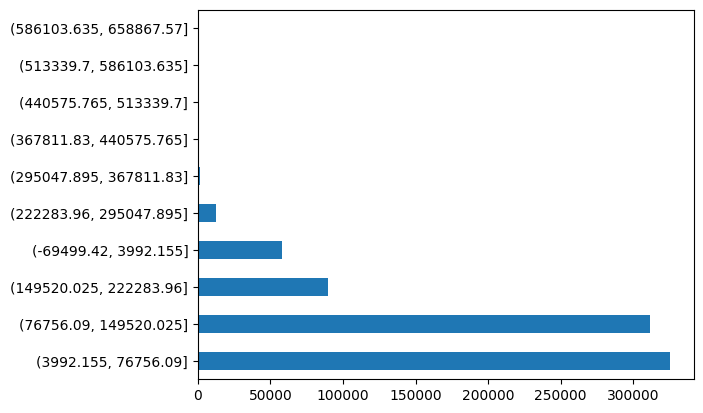

In [ ]:
employee_compensation_data.total_salary.value_counts(bins=10).plot.barh()

# add the labels 

**Checking the Outliers**

**removing outliers for "total salary"**

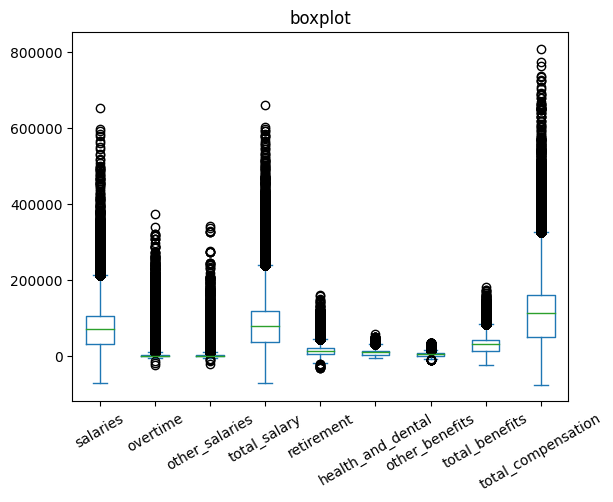

In [ ]:
employee_compensation_float = employee_compensation_data.loc[:, employee_compensation_data.dtypes == "float"]
ax = employee_compensation_float.plot(kind='box', title='boxplot')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

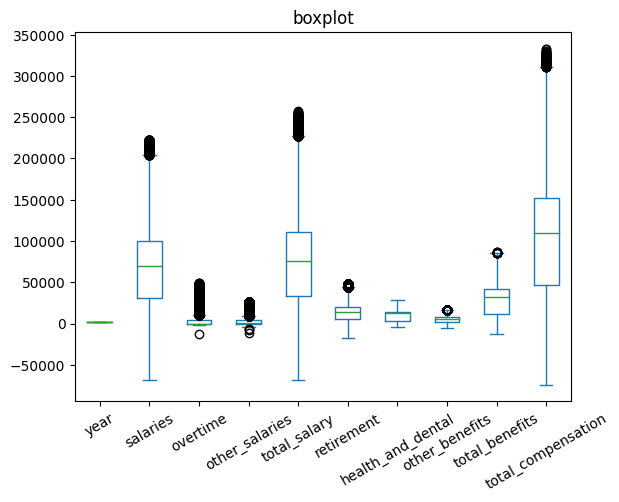

In [63]:
from scipy import stats

# calculate z-scores for each column
z_scores = stats.zscore(employee_compensation_data.loc[:, employee_compensation_data.dtypes == "float"])

# find absolute z-scores greater than 3
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)

# remove outliers from the dataframe
employee_compensation_remove_outliers = employee_compensation_data[~outliers]

ax = employee_compensation_remove_outliers.plot(kind='box', title='boxplot')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

In [65]:
min_threshold, max_threshold = employee_compensation_data.total_salary.quantile([0.05, 0.90])

In [66]:
cleanned_data = employee_compensation_data[(employee_compensation_data.total_salary > min_threshold) & 
                                           (employee_compensation_data.total_salary < max_threshold)]

<Axes: ylabel='total_salary'>

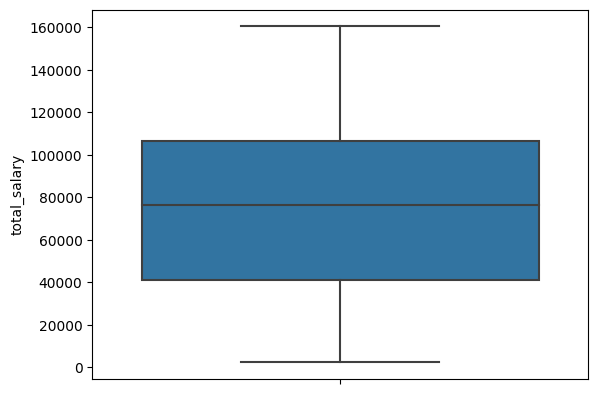

In [67]:
sns.boxplot(data=cleanned_data, y=cleanned_data.total_salary)

**Q1. Which organization group spending more time at work(overtime)?**

<Axes: xlabel='overtime', ylabel='organization_group'>

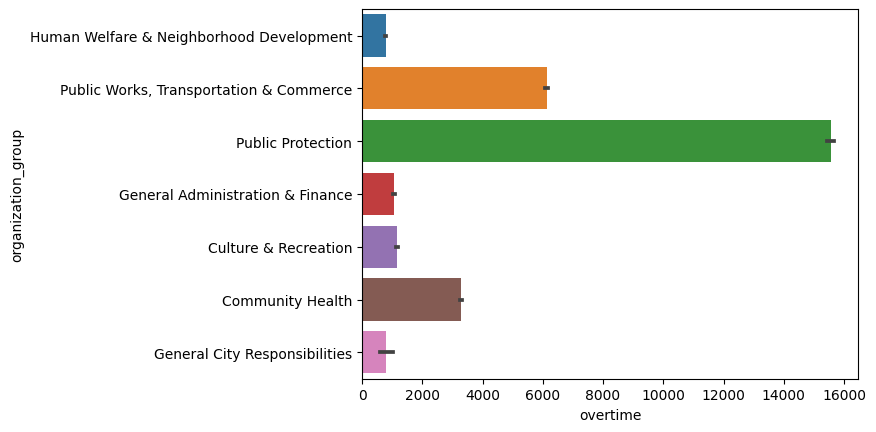

In [ ]:
sns.barplot(y=employee_compensation_data.organization_group, x=employee_compensation_data.overtime)

From the analysis, we noted that the highest number of employees working overtime are belong to the Public Sector organization.

We also noticed that there is a gradual increase in employees working overtime over the years with year 2022 showing a steep increase of 9000 hours across all organizations.


**What factors contribute to the anomalies or discrepancies in the compensation structure?**

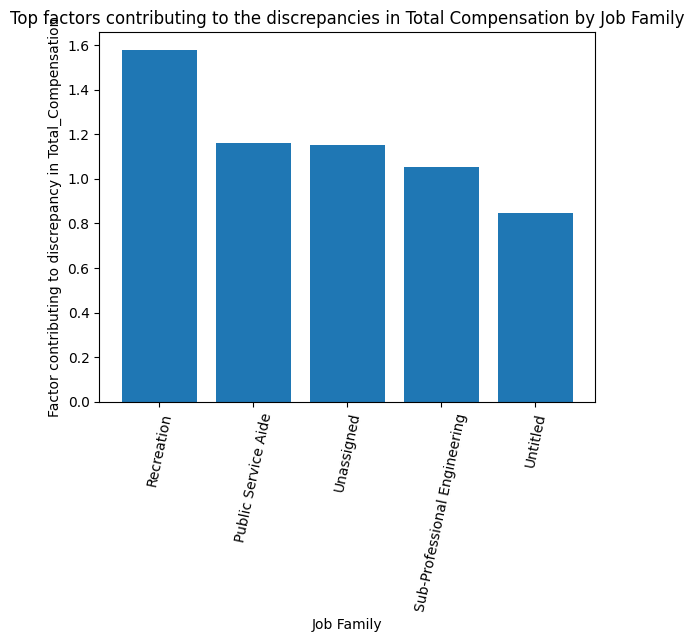

In [ ]:
mean_compensation = employee_compensation_data.groupby('job_family')['total_compensation'].mean()

# Compute the top factors contributing to the discrepancies in Total Compensation
top_factors = (employee_compensation_data.groupby('job_family')['total_compensation'].std() / mean_compensation).nlargest(5)

# Create a bar plot to visualize the top factors contributing to the discrepancies in Total Compensation
plt.bar(top_factors.index, top_factors)
plt.xticks(rotation=78)
plt.xlabel('Job Family')
plt.ylabel('Factor contributing to discrepancy in Total_Compensation')
plt.title('Top factors contributing to the discrepancies in Total Compensation by Job Family')

# Show the plot
plt.show()

#### Histogram of Salaries

#### Boxplot of Total Compensation by Department

#### **Q2. Does overtime increased or decreased irrespective of the job type in the given time period(2013-2022)**

<Axes: xlabel='year', ylabel='overtime'>

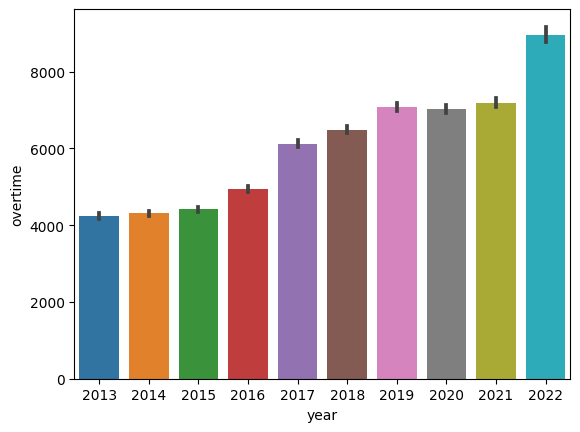

In [ ]:
sns.barplot(y= employee_compensation_data['overtime'], x= employee_compensation_data['year'])


**Heatmap of Correlation Matrix**

<ipython-input-49-38fced66bbb4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = employee_compensation_data.corr()


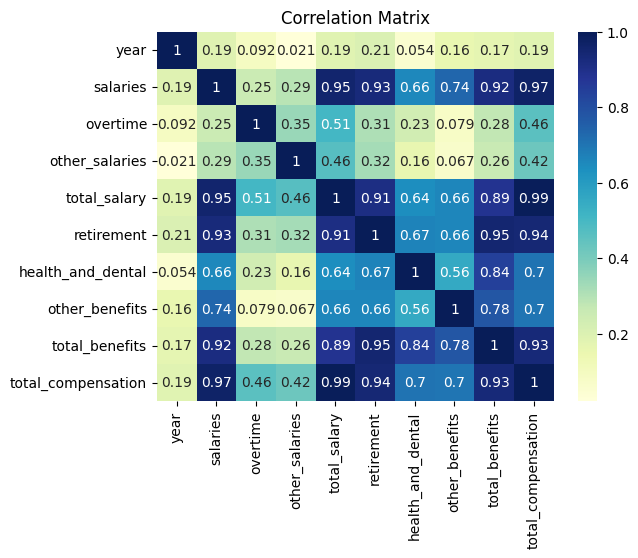

In [ ]:
corr_matrix = employee_compensation_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()


#### Boxplot of total compensation by organization group

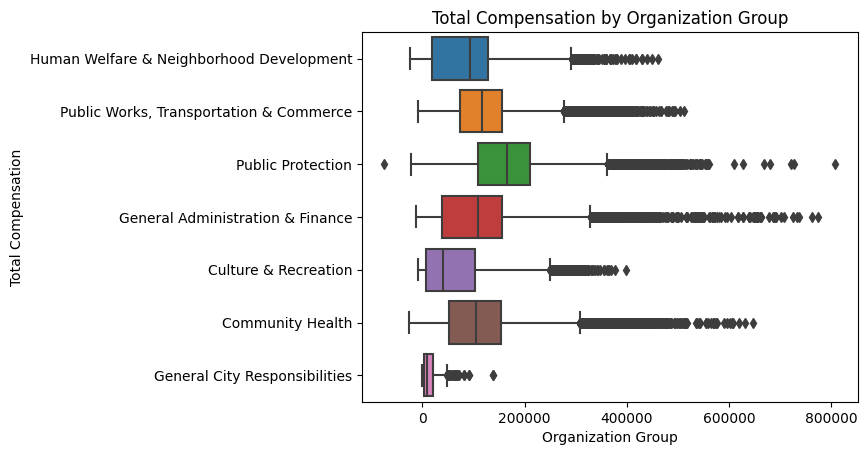

In [ ]:
# create boxplot
sns.boxplot(y='organization_group', x='total_compensation', data=employee_compensation_data)

# set axis labels and title
plt.xlabel('Organization Group')
plt.ylabel('Total Compensation')
plt.title('Total Compensation by Organization Group')
plt.show()


**Is Salary Distribution/ benefits same across all the years? **bold text**

Stacked bar chart of benefits by job family**
stacked bar chart to compare the breakdown of different types of benefits (retirement, health and dental, other benefits) across different job families.

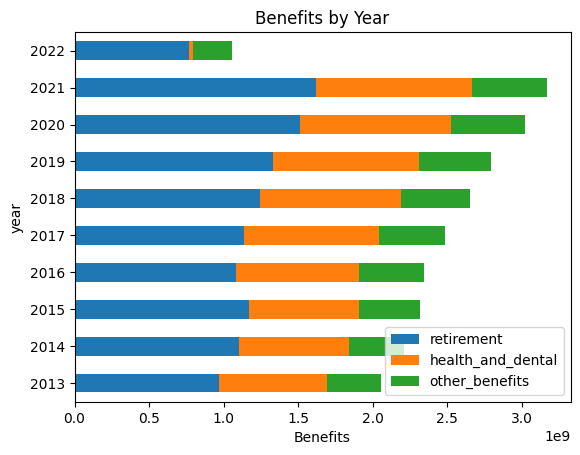

In [ ]:
# create new dataframe with benefit columns
benefits = employee_compensation_data[['year', 'retirement', 'health_and_dental', 'other_benefits']]

# group by job family and sum the benefits
benefits = benefits.groupby('year').sum()

# create stacked bar chart
benefits.plot(kind='barh', stacked=True)

# set axis labels and title
plt.xlabel('Benefits')
plt.ylabel('year')
plt.title('Benefits by Year')
plt.show()


# **Q3.Are employees getting paid for the amount of time and overtime what they are contributing towards their job?**

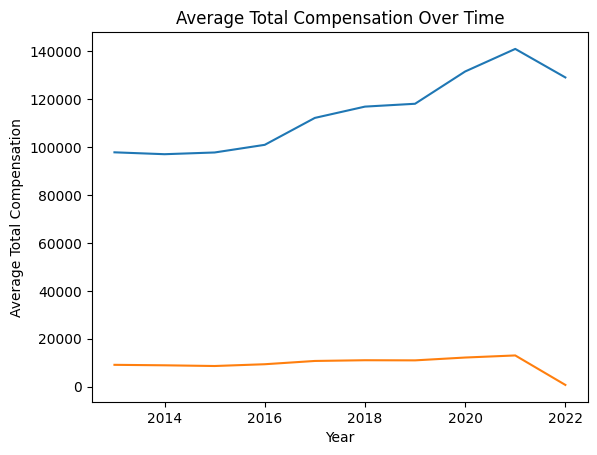

In [ ]:
# create new dataframe with average compensation by year
compensation_by_year = employee_compensation_data.groupby('year')['total_compensation'].mean().reset_index()
healthben_by_year = employee_compensation_data.groupby('year')['health_and_dental'].mean().reset_index()
# create line chart
plt.plot(compensation_by_year['year'], compensation_by_year['total_compensation'])
plt.plot(healthben_by_year['year'], healthben_by_year['health_and_dental'])
# set axis labels and title
plt.xlabel('Year')
plt.ylabel('Average Total Compensation')
plt.title('Average Total Compensation Over Time')
plt.show()


We see a gradual increase in the salary compensations of the employees in all departments in the years, however, from 2021 we see that the employees are receiving less salary compensations compared to the previous years which continues in the year 2022. 

This raises a concern since we see employees increasing their over time in the respective jobs but there is decrement in the salary compensations and benefits received. 

Many factors may have contributed to this issue.



**Q2.Find the Employee Compensation in each Department in the San Francisco city**

<ipython-input-53-96d9d829ef65>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_dept = df_dept.append(test, ignore_index = True)


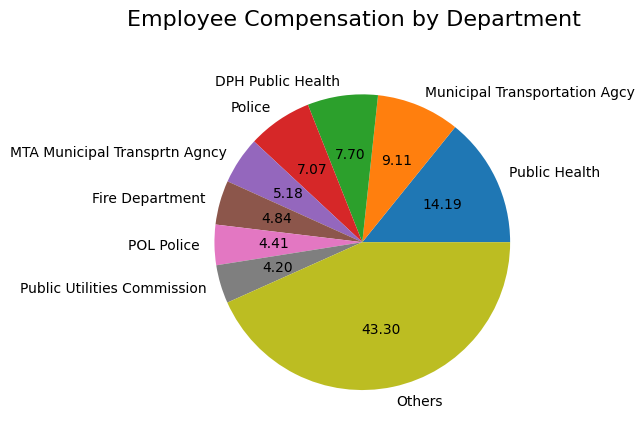

In [ ]:
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 4 else ''


# aggregate the data by department
df_dept = employee_compensation_data.groupby('department').agg({'total_salary': 'sum'}).reset_index()

# sort the data by total_payments
df_dept = df_dept.sort_values(by='total_salary', ascending=False)

# add a new column for the percentage of total_payments
df_dept['percentage'] = df_dept['total_salary'] / df_dept['total_salary'].sum() * 100

per = df_dept[df_dept.percentage < 4].percentage.sum()
total_sal = df_dept[df_dept.percentage < 4].total_salary.sum()
df_dept = df_dept[df_dept['percentage'] > 4]
test = pd.DataFrame({"department":["Others"],
                    "total_salary":[total_sal],
                    "percentage": [per]})
df_dept = df_dept.append(test, ignore_index = True)

# plot the pie chart for total payments
plt.pie(df_dept['total_salary'], labels=df_dept['department'], autopct=my_autopct)
#fig.set_title('Total Payments by Department')
# add a common title
plt.suptitle('Employee Compensation by Department', fontsize=16)

# show the plot
plt.show()
